In [206]:
import pandas as pd
import numpy as np


In [207]:
df = pd.read_csv('uzb_housing.csv')
df.head(5)

,home_id,price,area,living_area,kitchen_area,number_of_rooms,status,furnishing_status,bathroom,floor,total_floors,built_year,address,with_makler,home_ad_link
0,1,109000.0,120.0,120.0,10.0,6,new,furnished,private,2,2,2020.0,Sirg‘ali,True,https://www.olx.uz/d/oz/obyavlenie/kivartira-s...
1,2,1000.0,131.0,104.8,26.2,3,new,unfurnished,NaN,5,10,NaN,Olmazor,False,https://www.olx.uz/d/oz/obyavlenie/kvartira-sr...
2,3,180000.0,173.0,138.4,34.6,3,new,furnished,shared,8,8,NaN,Yakkasaroy,False,https://www.olx.uz/d/oz/obyavlenie/prodaetsya-...
3,4,40000.0,33.0,21.0,12.0,1,new,unfurnished,private,1,6,2023.0,Sirg‘ali,False,https://www.olx.uz/d/oz/obyavlenie/yangi-hayot...
4,5,85000.0,400.0,360.0,80.0,7,new,unfurnished,NaN,3,3,NaN,Nazarbek,False,https://www.olx.uz/d/oz/obyavlenie/euro-stilda...


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   home_id            1285 non-null   int64  
 1   price              1285 non-null   float64
 2   area               1285 non-null   float64
 3   living_area        1285 non-null   float64
 4   kitchen_area       1285 non-null   float64
 5   number_of_rooms    1285 non-null   int64  
 6   status             1285 non-null   object 
 7   furnishing_status  1285 non-null   object 
 8   bathroom           865 non-null    object 
 9   floor              1285 non-null   int64  
 10  total_floors       1285 non-null   int64  
 11  built_year         325 non-null    float64
 12  address            1285 non-null   object 
 13  with_makler        1285 non-null   bool   
 14  home_ad_link       1285 non-null   object 
dtypes: bool(1), float64(5), int64(4), object(5)
memory usage: 141.9+ KB


In [209]:
df.describe()

,home_id,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors,built_year
count,1285.000000,1.285000e+03,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,325.000000
mean,643.000000,2.548734e+07,81.909276,73.006163,17.396054,2.665370,6.347082,10.961868,2020.036923
std,371.091857,1.056468e+08,48.080221,147.667673,19.915247,1.180088,4.275118,7.522610,7.393181
min,1.000000,5.200000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1960.000000
25%,322.000000,6.200000e+04,54.000000,44.000000,10.000000,2.000000,3.000000,7.000000,2020.000000
50%,643.000000,1.000000e+05,70.000000,60.000000,14.000000,3.000000,6.000000,9.000000,2022.000000
75%,964.000000,1.800000e+05,97.000000,80.000000,20.000000,3.000000,8.000000,12.000000,2023.000000
max,1285.000000,1.016000e+09,675.000000,5151.000000,589.000000,12.000000,39.000000,52.000000,2024.000000


In [210]:
df.isnull().sum()

home_id                0
price                  0
area                   0
living_area            0
kitchen_area           0
number_of_rooms        0
status                 0
furnishing_status      0
bathroom             420
floor                  0
total_floors           0
built_year           960
address                0
with_makler            0
home_ad_link           0
dtype: int64

#### bathroom va built_year katta miqdorda data yo'q shuning uchun drop qilinadi

In [211]:
df = df.drop(columns=["bathroom", "built_year"])
df.isnull().sum()

home_id              0
price                0
area                 0
living_area          0
kitchen_area         0
number_of_rooms      0
status               0
furnishing_status    0
floor                0
total_floors         0
address              0
with_makler          0
home_ad_link         0
dtype: int64

In [212]:
df["status"].value_counts()

status
new    1277
old       8
Name: count, dtype: int64

#### status deyarli hammasida bir xil, shuning uchun drop

In [213]:
df = df.drop(columns=["status"])
df.isnull().sum()

home_id              0
price                0
area                 0
living_area          0
kitchen_area         0
number_of_rooms      0
furnishing_status    0
floor                0
total_floors         0
address              0
with_makler          0
home_ad_link         0
dtype: int64

#### home_ad_link va home_id keraksiz ma'lumot

In [214]:
df = df.drop(columns=["home_ad_link", "home_id"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1285 non-null   float64
 1   area               1285 non-null   float64
 2   living_area        1285 non-null   float64
 3   kitchen_area       1285 non-null   float64
 4   number_of_rooms    1285 non-null   int64  
 5   furnishing_status  1285 non-null   object 
 6   floor              1285 non-null   int64  
 7   total_floors       1285 non-null   int64  
 8   address            1285 non-null   object 
 9   with_makler        1285 non-null   bool   
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 91.7+ KB


million dollarlik uylar mavjud emas, bu datada millionlarning borligi data dollar va sum da 
aralash ketgan. Shuning uchun 1000 000 dan katta qiynatlarni dollarga convert qilamiz. 1 $ = 12 706 sum

In [215]:
dollar_kursi = 12706
df["price"] = df["price"].where(df["price"] <= 1000000, df["price"] / dollar_kursi)
df.describe()

,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors
count,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000
mean,116261.194894,81.909276,73.006163,17.396054,2.665370,6.347082,10.961868
std,101471.696285,48.080221,147.667673,19.915247,1.180088,4.275118,7.522610
min,94.443570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,54000.000000,54.000000,44.000000,10.000000,2.000000,3.000000,7.000000
50%,82000.000000,70.000000,60.000000,14.000000,3.000000,6.000000,9.000000
75%,155000.000000,97.000000,80.000000,20.000000,3.000000,8.000000,12.000000
max,930000.000000,675.000000,5151.000000,589.000000,12.000000,39.000000,52.000000


In [216]:
# drop if area is less than 25

df = df[df["area"] >= 25]


In [217]:
# drop if price is less than 10,000
df = df[df["price"] > 10000]
df.describe()

,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,120050.319147,82.074742,73.080831,16.973855,2.669355,6.379839,10.912097
std,101144.222869,47.804784,149.882533,11.969549,1.170127,4.294834,7.360838
min,11805.446246,25.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,55006.750000,54.405000,44.800000,10.000000,2.000000,3.000000,7.000000
50%,85000.000000,70.000000,60.000000,14.000000,3.000000,6.000000,9.000000
75%,158000.000000,96.000000,80.000000,20.000000,3.000000,8.000000,12.000000
max,930000.000000,675.000000,5151.000000,166.000000,12.000000,39.000000,52.000000


In [218]:
# creating new feature
df["price_per_m2"] = df["price"] / df["area"]
df.describe()

,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors,price_per_m2
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,120050.319147,82.074742,73.080831,16.973855,2.669355,6.379839,10.912097,1438.328493
std,101144.222869,47.804784,149.882533,11.969549,1.170127,4.294834,7.360838,853.134568
min,11805.446246,25.000000,1.000000,1.000000,1.000000,1.000000,2.000000,96.296296
25%,55006.750000,54.405000,44.800000,10.000000,2.000000,3.000000,7.000000,905.870164
50%,85000.000000,70.000000,60.000000,14.000000,3.000000,6.000000,9.000000,1171.428571
75%,158000.000000,96.000000,80.000000,20.000000,3.000000,8.000000,12.000000,1782.360119
max,930000.000000,675.000000,5151.000000,166.000000,12.000000,39.000000,52.000000,6578.947368


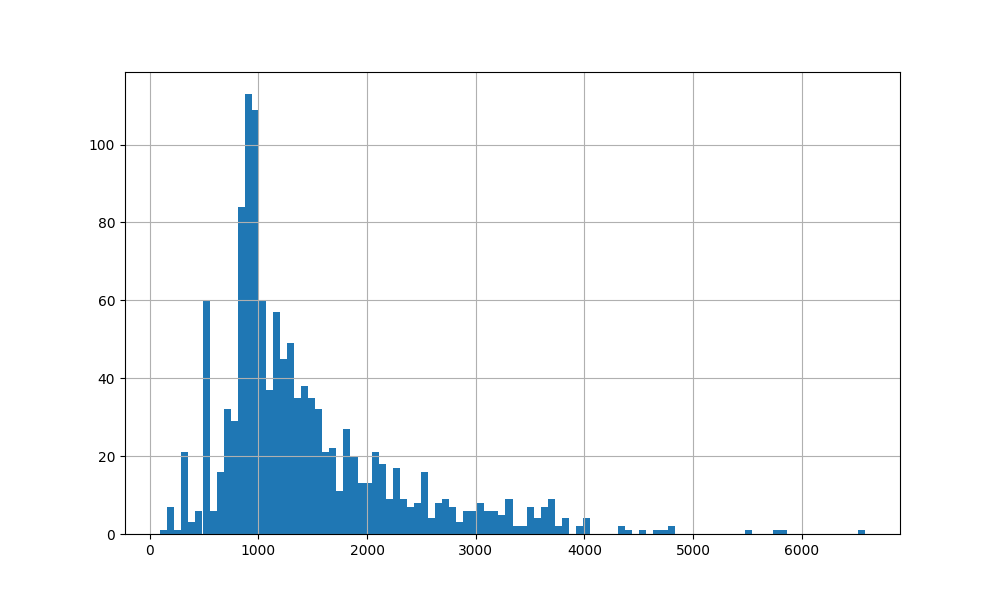

In [219]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df["price_per_m2"].hist(bins=100)
plt.show()

In [220]:
# drop if price_per_m2 is geater than 4050

df = df[(df["price_per_m2"] <= 4050) & (df["price_per_m2"] >= 300)]
df.describe()

,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors,price_per_m2
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,117094.687575,81.214258,72.304372,16.741821,2.662838,6.323216,10.885152,1412.316209
std,93274.831240,44.051354,149.928774,11.012277,1.171089,4.153525,7.280557,772.861602
min,12749.881946,25.000000,1.000000,1.000000,1.000000,1.000000,2.000000,300.000000
25%,55500.000000,54.000000,44.000000,10.000000,2.000000,3.000000,7.000000,908.333333
50%,84000.000000,70.000000,60.000000,14.000000,3.000000,6.000000,9.000000,1171.428571
75%,155000.000000,96.000000,78.400000,20.000000,3.000000,8.000000,12.000000,1743.189964
max,930000.000000,411.000000,5151.000000,166.000000,12.000000,27.000000,52.000000,4025.000000


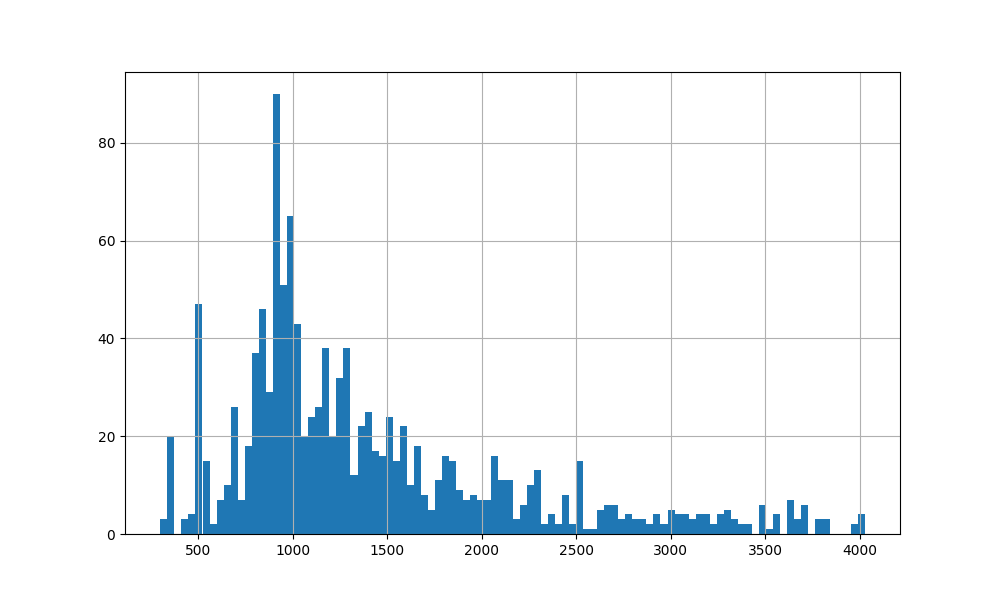

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df["price_per_m2"].hist(bins=100)
plt.show()

In [222]:
# drop if living area less than 10 m2

df = df[df["living_area"]>10]
df = df[df["kitchen_area"]>6]
df.describe()

,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors,price_per_m2
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000
mean,118860.717086,82.126698,73.178997,17.071306,2.683235,6.365628,10.839933,1418.080917
std,93792.337853,44.171452,151.800782,10.968920,1.166890,4.178896,7.070089,772.018260
min,12749.881946,25.400000,14.000000,6.340000,1.000000,1.000000,2.000000,300.000000
25%,56000.000000,55.000000,44.800000,10.400000,2.000000,3.000000,7.000000,908.333333
50%,85200.000000,70.000000,60.000000,14.000000,3.000000,6.000000,9.000000,1171.428571
75%,158000.500000,97.000000,80.000000,20.000000,3.000000,8.000000,12.000000,1769.172932
max,930000.000000,411.000000,5151.000000,166.000000,12.000000,27.000000,52.000000,4025.000000


### Birlamchi tozalangan data

In [223]:
df1 = df.copy()
df1.describe()

,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors,price_per_m2
count,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000
mean,118860.717086,82.126698,73.178997,17.071306,2.683235,6.365628,10.839933,1418.080917
std,93792.337853,44.171452,151.800782,10.968920,1.166890,4.178896,7.070089,772.018260
min,12749.881946,25.400000,14.000000,6.340000,1.000000,1.000000,2.000000,300.000000
25%,56000.000000,55.000000,44.800000,10.400000,2.000000,3.000000,7.000000,908.333333
50%,85200.000000,70.000000,60.000000,14.000000,3.000000,6.000000,9.000000,1171.428571
75%,158000.500000,97.000000,80.000000,20.000000,3.000000,8.000000,12.000000,1769.172932
max,930000.000000,411.000000,5151.000000,166.000000,12.000000,27.000000,52.000000,4025.000000


In [224]:
df1.head(5)

,price,area,living_area,kitchen_area,number_of_rooms,furnishing_status,floor,total_floors,address,with_makler,price_per_m2
0,109000.0,120.0,120.0,10.0,6,furnished,2,2,Sirg‘ali,True,908.333333
2,180000.0,173.0,138.4,34.6,3,furnished,8,8,Yakkasaroy,False,1040.462428
3,40000.0,33.0,21.0,12.0,1,unfurnished,1,6,Sirg‘ali,False,1212.121212
5,49900.0,54.0,43.2,10.8,2,unfurnished,4,9,Yakkasaroy,False,924.074074
6,178000.0,107.0,85.6,21.4,4,furnished,1,3,Mirzo-Ulug‘bek,False,1663.551402


In [225]:
df1['address'].value_counts()

address
Sirg‘ali          160
Yakkasaroy        151
Shayxontohur      140
Yashnobod         139
Mirobod           128
Mirzo-Ulug‘bek    126
Yunusobod          92
Olmazor            59
Chirchiq           45
To'ytepa           33
Uchtepa            28
Nazarbek           23
Eshonguzar         21
Chilonzor          14
Keles               7
Bektemir            6
Yangiyo'l           4
Zangiota            2
Ohangaron           2
Qibray              2
Olmaliq             2
Oʻrtaovul           1
Ko'ksaroy           1
Buxoro              1
Name: count, dtype: int64

In [226]:
#drop adresses where appean less than 10 
address_counts = df1['address'].value_counts()
valid_addresses = address_counts[address_counts >= 10].index
df1 = df1[df['address'].isin(valid_addresses)]
df1['address'].value_counts()

address
Sirg‘ali          160
Yakkasaroy        151
Shayxontohur      140
Yashnobod         139
Mirobod           128
Mirzo-Ulug‘bek    126
Yunusobod          92
Olmazor            59
Chirchiq           45
To'ytepa           33
Uchtepa            28
Nazarbek           23
Eshonguzar         21
Chilonzor          14
Name: count, dtype: int64

In [227]:
df1.head(5)

,price,area,living_area,kitchen_area,number_of_rooms,furnishing_status,floor,total_floors,address,with_makler,price_per_m2
0,109000.0,120.0,120.0,10.0,6,furnished,2,2,Sirg‘ali,True,908.333333
2,180000.0,173.0,138.4,34.6,3,furnished,8,8,Yakkasaroy,False,1040.462428
3,40000.0,33.0,21.0,12.0,1,unfurnished,1,6,Sirg‘ali,False,1212.121212
5,49900.0,54.0,43.2,10.8,2,unfurnished,4,9,Yakkasaroy,False,924.074074
6,178000.0,107.0,85.6,21.4,4,furnished,1,3,Mirzo-Ulug‘bek,False,1663.551402


In [228]:
from sklearn.preprocessing import OneHotEncoder

# Columns to encode
categorical_cols = ['furnishing_status', 'with_makler']

# Updated encoder for scikit-learn >= 1.2
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' is optional

# Fit and transform
encoded_array = encoder.fit_transform(df1[categorical_cols])

# Convert to DataFrame
encoded_df1 = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate back with the rest of the DataFrame
df_encoded1 = pd.concat([df1.drop(columns=categorical_cols).reset_index(drop=True),
                         encoded_df1.reset_index(drop=True)], axis=1)

df_encoded1.head(5)


,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors,address,price_per_m2,furnishing_status_unfurnished,with_makler_True
0,109000.0,120.0,120.0,10.0,6,2,2,Sirg‘ali,908.333333,0.0,1.0
1,180000.0,173.0,138.4,34.6,3,8,8,Yakkasaroy,1040.462428,0.0,0.0
2,40000.0,33.0,21.0,12.0,1,1,6,Sirg‘ali,1212.121212,1.0,0.0
3,49900.0,54.0,43.2,10.8,2,4,9,Yakkasaroy,924.074074,1.0,0.0
4,178000.0,107.0,85.6,21.4,4,1,3,Mirzo-Ulug‘bek,1663.551402,0.0,0.0


In [229]:
from sklearn.preprocessing import OneHotEncoder

# Columns to encode
categorical_cols = ['address']

# Updated encoder for scikit-learn >= 1.2
encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop='first' is optional

# Fit and transform
encoded_array = encoder.fit_transform(df_encoded1[categorical_cols])

# Convert to DataFrame
encoded_df2 = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate back with the rest of the DataFrame
df_encoded2 = pd.concat([df_encoded1.drop(columns=categorical_cols).reset_index(drop=True),
                         encoded_df2.reset_index(drop=True)], axis=1)

df_encoded2.head(5)

,price,area,living_area,kitchen_area,number_of_rooms,floor,total_floors,price_per_m2,furnishing_status_unfurnished,with_makler_True,...,address_Mirzo-Ulug‘bek,address_Nazarbek,address_Olmazor,address_Shayxontohur,address_Sirg‘ali,address_To'ytepa,address_Uchtepa,address_Yakkasaroy,address_Yashnobod,address_Yunusobod
0,109000.0,120.0,120.0,10.0,6,2,2,908.333333,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,180000.0,173.0,138.4,34.6,3,8,8,1040.462428,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,40000.0,33.0,21.0,12.0,1,1,6,1212.121212,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,49900.0,54.0,43.2,10.8,2,4,9,924.074074,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,178000.0,107.0,85.6,21.4,4,1,3,1663.551402,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
df_encoded2.to_csv("encoded_housing_data.csv", index=False)